In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the exacl file and convert to a Pandas dataframe
df_times_edu = pd.read_excel('./Times Higher Education.xlsx')

In [3]:
df_world_rank = pd.read_excel('./Word Rank University.xlsx')

In [4]:
df_shanghai_rank = pd.read_excel('./shanghai Ranking.xlsx')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df_times_edu.head() #-> view first 5 rows

,Rank,University Name,Unnamed: 2,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_times_edu.shape

(1591, 20)

In [7]:
df_shanghai_rank.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [8]:
df_shanghai_rank.shape

(1000, 6)

In [9]:
df_times_edu.head()

,Rank,University Name,Unnamed: 2,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_times_edu.shape

(1591, 20)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [11]:
df_times_edu.describe(include='object')

,Rank,University Name,Unnamed: 2,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1519,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,37,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [12]:
df_shanghai_rank.describe(include='object')

,Ranking,University Name,National/Regional Rank,LOGO,University Detail
count,1000,1000,1000,1000,1000
unique,93,1000,136,1000,1000
top,901-1000,Harvard University,1,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
freq,100,1,59,1,1


In [13]:
df_world_rank.describe(include='all')

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
count,2000,2000,2000,2000.000000,2000,2000,2000,2000,2000.00000
unique,2000,2000,95,NaN,439,1030,262,1935,NaN
top,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,NaN,-,-,-,-,NaN
freq,1,1,332,NaN,1562,967,1727,66,NaN
mean,NaN,NaN,NaN,69.245000,NaN,NaN,NaN,NaN,71.75555
std,NaN,NaN,NaN,85.538608,NaN,NaN,NaN,NaN,5.03880
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,66.00000
25%,NaN,NaN,NaN,9.750000,NaN,NaN,NaN,NaN,67.90000
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,70.40000
75%,NaN,NaN,NaN,89.000000,NaN,NaN,NaN,NaN,74.30000


In [14]:
#Delete unrelevent columns
df_shanghai_rank.drop(["LOGO"],axis=1,inplace=True)

In [15]:
df_shanghai_rank.drop(['University Detail '], axis=1, inplace=True)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

The data comes from a reliable dataset on Kaggle, which is collected from several well-known international classifications.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

The university rankings dataset was last updated one year ago

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


the data has been confirmed to be consistent within the dataset

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


The data is relevant which makes it suitable for analysis.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [16]:
df_times_edu.duplicated().sum() # -> there is none

0

In [17]:
df_shanghai_rank.duplicated().sum() # -> there is none

0

In [18]:
df_world_rank.duplicated().sum() # -> there is none

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [19]:
#Display number missing values per column
df_times_edu.isnull().sum().sort_values(ascending = False) 

sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__value 8     1108
sdg-score-multi__number 8    1108
sdg-score-multi__value 6     1095
sdg-score-multi__number 6    1093
sdg-score-multi__value 5     1034
sdg-score-multi__number 5    1026
sdg-score-multi__value 3      786
sdg-score-multi__number 3     779
sdg-score-multi__value 2      766
sdg-score-multi__number 2     765
sdg-score-multi__number       724
sdg-score-multi__value        724
Unnamed: 2                     91
Location                       91
Rank                           72
sdg-score-multi__value 4        8
scores                          0
University Name                 0
dtype: int64

In [20]:
df_shanghai_rank.isnull().sum().sort_values(ascending = False)  #nulls here where score = 0

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
dtype: int64

In [21]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [22]:
# check columns types 
df_world_rank.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [23]:
# go to clean them 
df_world_rank['Global Rank'] = df_world_rank['World Rank'].apply(lambda x: x.split("T")[0]) #-> to make global rank with int values only

In [25]:
df_world_rank.rename(columns={'University Names':'University Name'}, inplace=True) # -> rename to avoid conflict acreoss datasets

In [31]:
df_world_rank['University Name'] = df_world_rank['University Name'].apply(lambda x: x.split('\n')[0]) #-> clean uni names

In [26]:
df_shanghai_rank.rename(columns={'Ranking':'Global Rank'}, inplace=True) # -> rename to avoid conflict acreoss datasets

In [27]:
df_times_edu.rename(columns={'Rank':'Global Rank'}, inplace=True) # -> rename to avoid conflict acreoss datasets

In [28]:
#change Educational rank Dtype
df_world_rank['Educational Rank'] = df_world_rank['Educational Rank'].apply(lambda x: 0 if x == '-' else int(x))

In [29]:
#change Employability Rank Dtyp
df_world_rank['Employability Rank']= df_world_rank['Employability Rank'].apply(lambda x: 0 if x == '-' else int(x))

In [32]:
#change faculty rank Dtype
df_world_rank['Faculty Rank']= df_world_rank['Faculty Rank'].apply(lambda x: 0 if x == '-' else int(x))

In [33]:
# change Research Rank rank Dtype
df_world_rank['Research Rank']= df_world_rank['Research Rank'].apply(lambda x: 0 if x == '-' else int(x))

#### Q1: Which universities are ranked in the top 10 globally?

In [34]:
df_world_rank[['Global Rank', 'University Name']].head(10) # -> Top 10 in world dataset


,Global Rank,University Name
0,1,Harvard University
1,2,Massachusetts Institute of Technology
2,3,Stanford University
3,4,University of Cambridge
4,5,University of Oxford
5,6,Princeton University
6,7,University of Chicago
7,8,Columbia University
8,9,University of Pennsylvania
9,10,Yale University


In [20]:
df_shanghai_rank[['Global Rank', 'University Name']].head(10) # -> Top 10 in shanghai dataset 

,Global Rank,University Name
0,1,Harvard University
1,2,Stanford University
2,3,Massachusetts Institute of Technology (MIT)
3,4,University of Cambridge
4,5,"University of California, Berkeley"
5,6,Princeton University
6,7,University of Oxford
7,8,Columbia University
8,9,California Institute of Technology
9,10,University of Chicago


In [23]:
df_shanghai_rank[['Global Rank', 'University Name']].head(10) # -> Top 10 in times edu dataset 

,Global Rank,University Name
0,1,Harvard University
1,2,Stanford University
2,3,Massachusetts Institute of Technology (MIT)
3,4,University of Cambridge
4,5,"University of California, Berkeley"
5,6,Princeton University
6,7,University of Oxford
7,8,Columbia University
8,9,California Institute of Technology
9,10,University of Chicago


#### Q2: Which universities are ranked in the top 10 for employment outcomes?

In [51]:
employment = df_world_rank.sort_values(by='Employability Rank', ignore_index = True)

employment[['University Name','Employability Rank','Global Rank']].head(10)
top_10_by_empo = employment.head(10) # -> get top based on employability rank



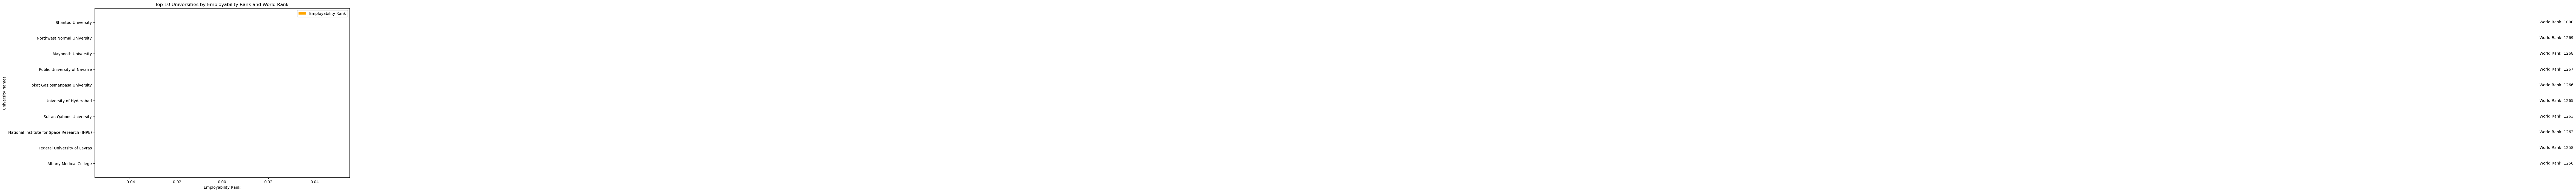

In [52]:
plt.figure(figsize=(12, 8))

plt.barh(top_10_by_empo['University Name'], top_10_by_empo['Employability Rank'], color='blue', label='Employability Rank')
plt.xlabel('Employability Rank')
plt.legend(loc='upper right')

for i, (uni, world_rank) in enumerate(zip(top_10_by_empo['University Name'], top_10_by_empo['Global Rank'])):
    plt.text(1, i, f'World Rank: {world_rank}', va='center')

plt.title('Top 10 Universities by Employability Rank and World Rank')
plt.ylabel('University Names')
plt.gca().invert_yaxis()
plt.show()

#### Q3: What positions do universities in Saudi Arabia hold within the global rankings?

In [14]:
world_rank_sa = df_world_rank[df_world_rank["Location "] == "Saudi Arabia"] # ->extract SA univiersites

num_rank = df_world_rank["Global Rank"] #get SA global rank
num_rank

top_p = df_world_rank["World Rank"].apply(lambda x: x.split("p")[1])
top_p

#world_rank["World Rank Num"] = num_rank.astype(int) Global Rank

df_world_rank["World Rank perc"] = top_p.apply(lambda x: float(x.split("%")[0])) # -> extract presentge %

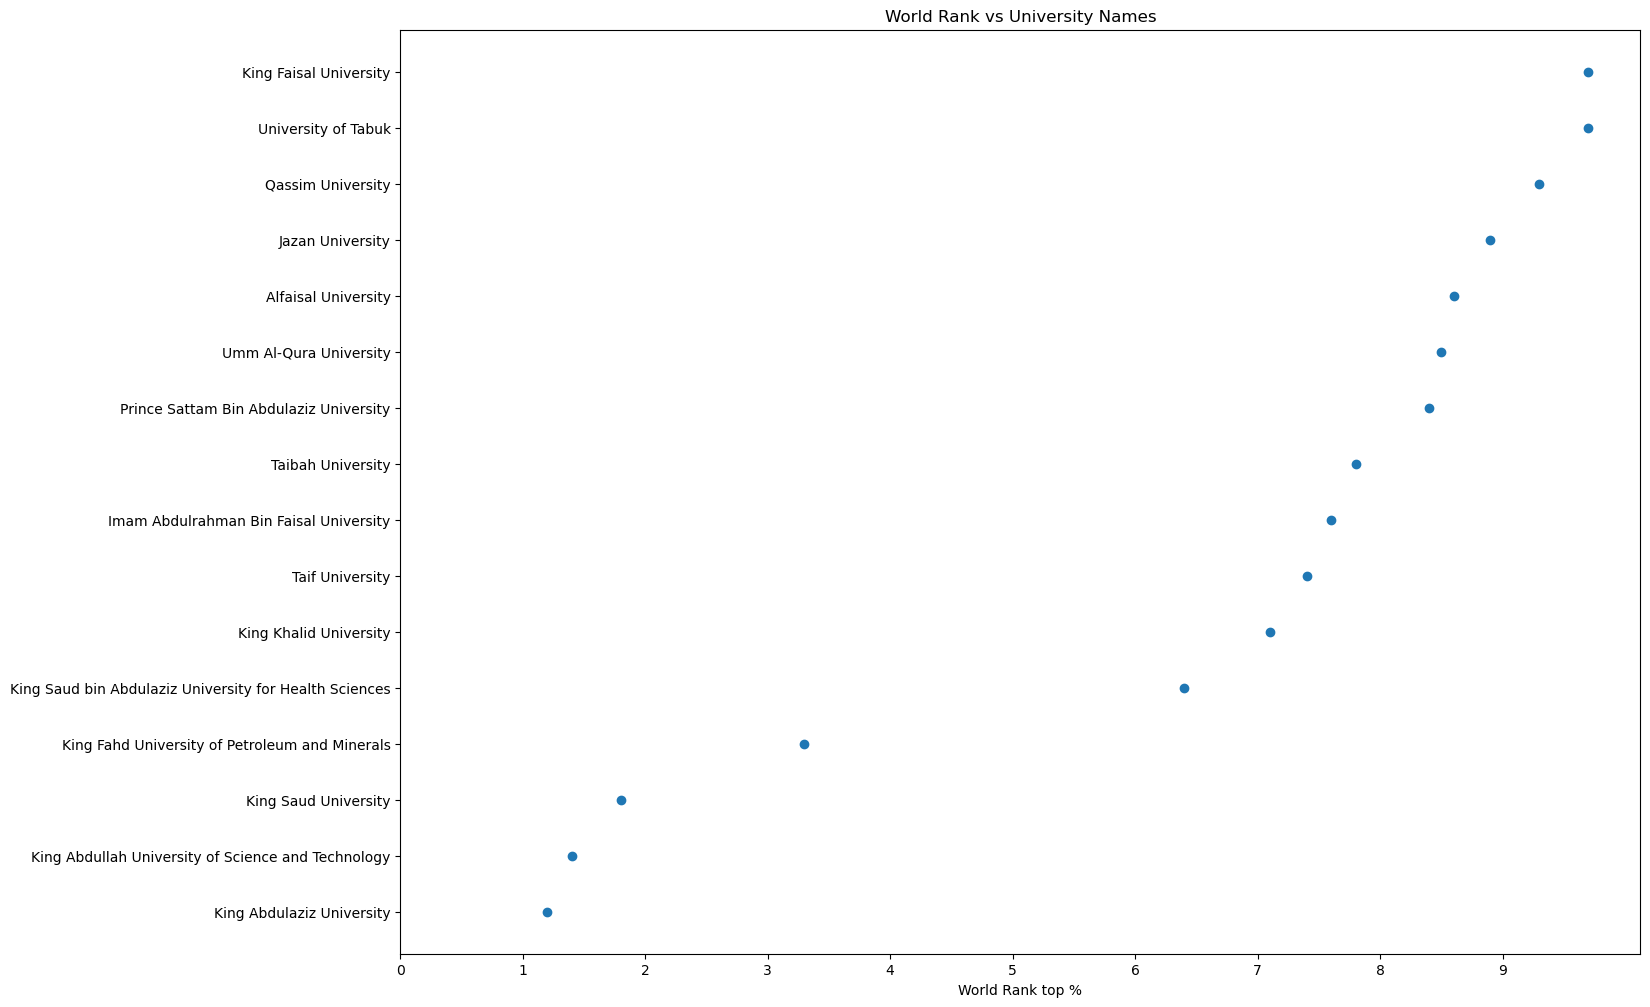

In [15]:
#finding where SA universities in world top universites
plt.figure(figsize=(16, 12))
plt.scatter(world_rank_sa["World Rank perc"], world_rank_sa["University Name"], )
plt.xticks(np.arange(0, 10, 1))
plt.xlabel("World Rank top %")
plt.title("World Rank vs University Names")
plt.show()

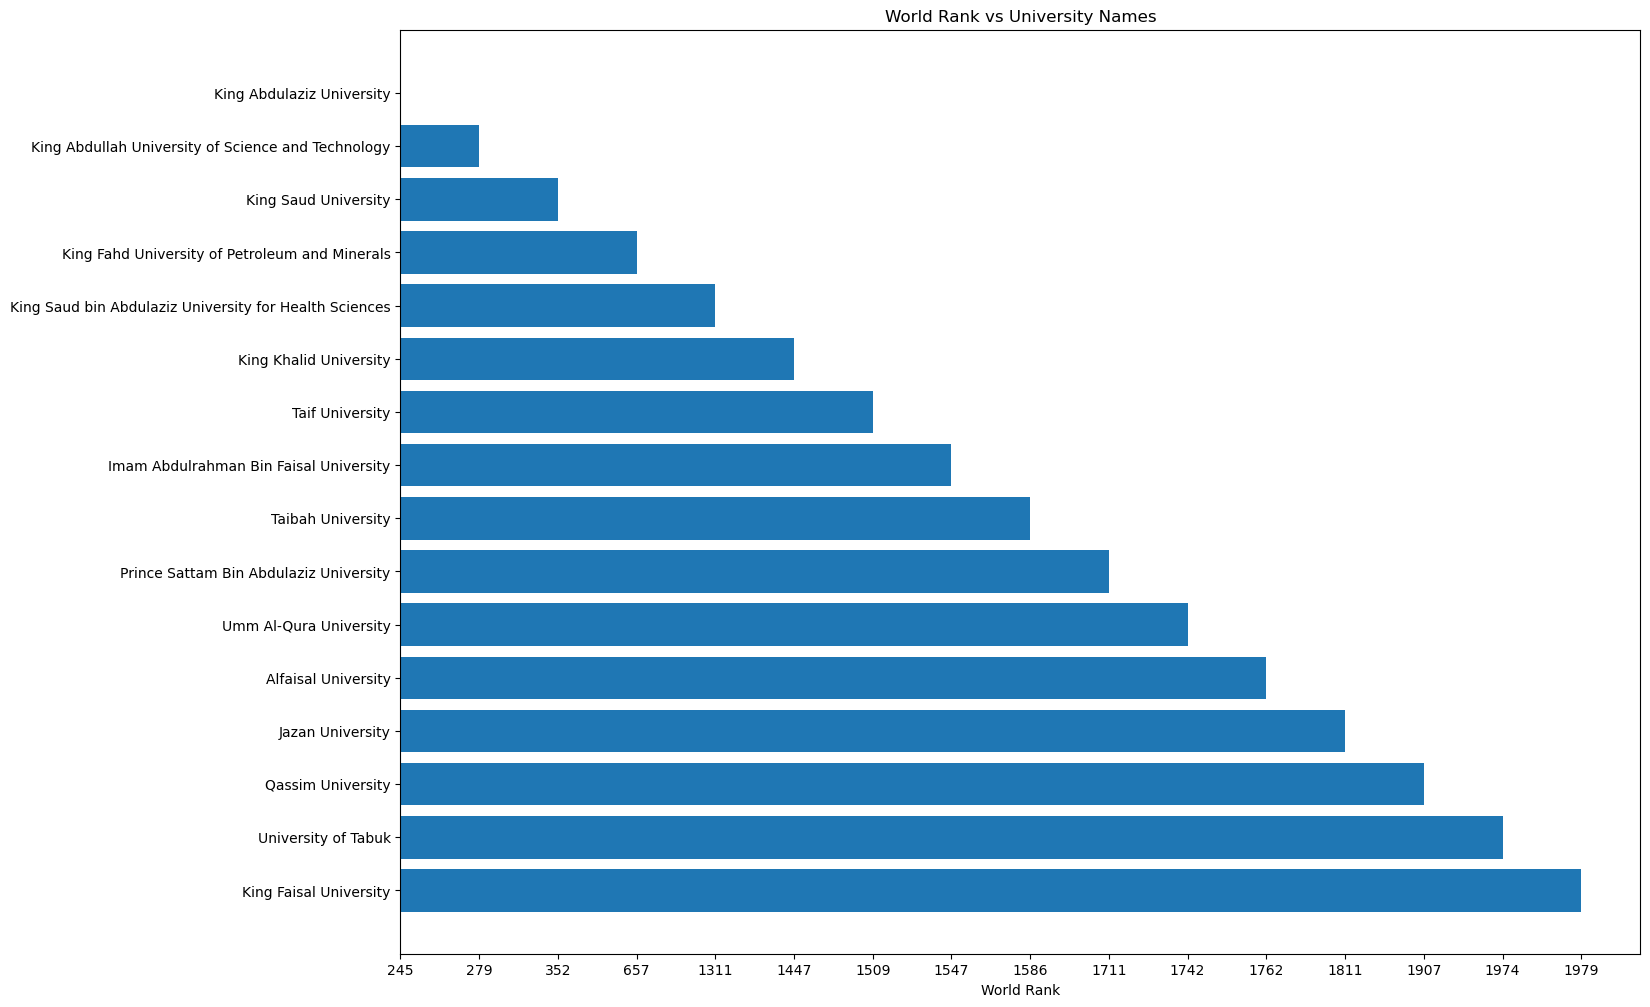

In [31]:
plt.figure(figsize=(16, 12))
plt.barh(world_rank_sa["University Name"], world_rank_sa["Global Rank"])
plt.gca().invert_yaxis()
plt.xlabel("World Rank")
plt.title("World Rank vs University Names")
plt.show()


In [ ]:
SA_times = df_times_edu[df_times_edu["Location"] == "Saudi Arabia"]
SA_times["Rank %"] = SA_times["Global Rank"].apply(lambda x: 0.99 if "–" not in x else float(x.split("–")[1])/ 1591)
SA_times["Rank %"]

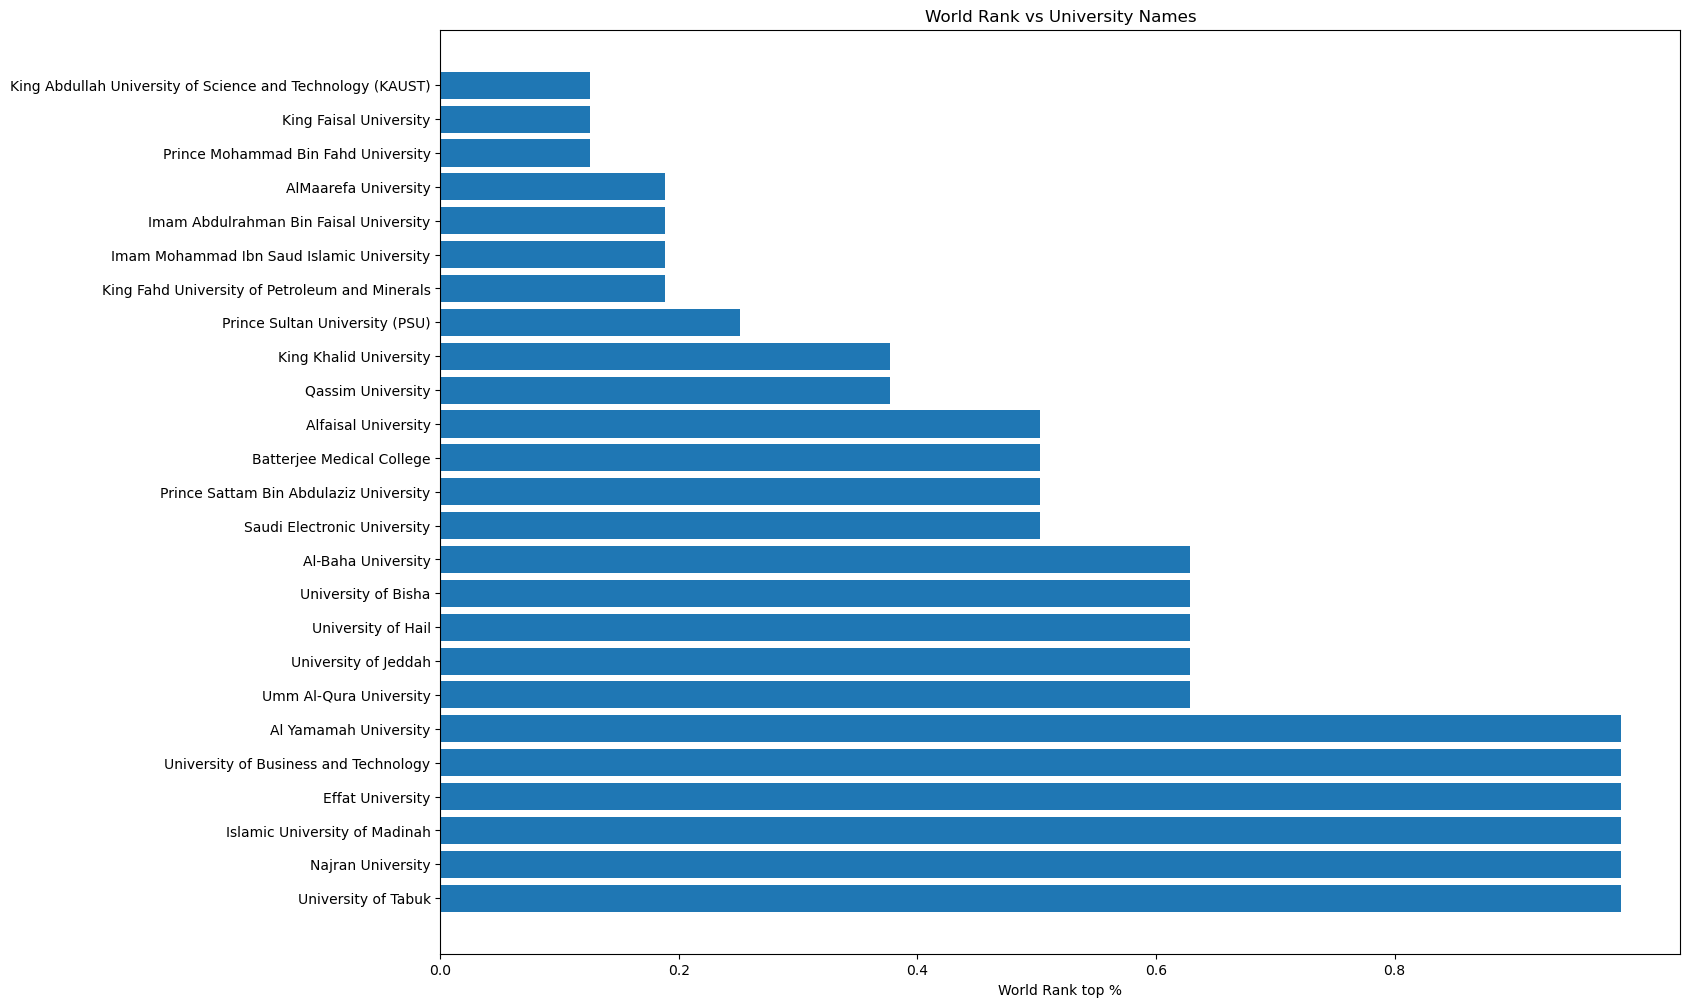

In [43]:
plt.figure(figsize=(16, 12))
plt.barh(SA_times["University Name "], SA_times["Rank %"] )
plt.xticks(np.arange(0, 1, 0.2))
plt.gca().invert_yaxis()
plt.xlabel("World Rank top %")
plt.title("World Rank vs University Names")
plt.show()

#### Q4: Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

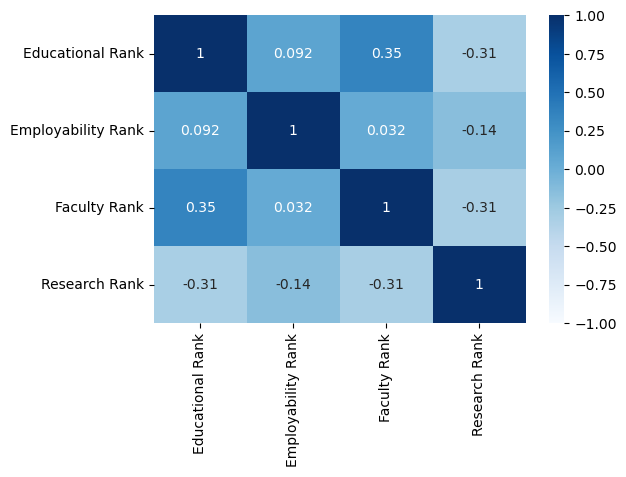

In [40]:
plt.figure(figsize=(6, 4))
cols = df_world_rank[['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Global Rank']].corr()
sns.heatmap(cols, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

#### Q5: Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

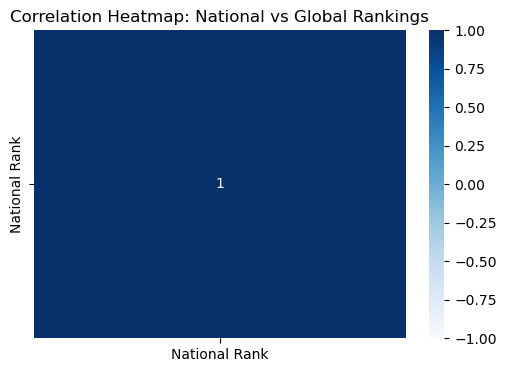

In [39]:
# Calculate correlation matrix
corr_matrix = df_world_rank[['National Rank', 'Global Rank']].corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: National vs Global Rankings')
plt.show()


In [35]:
top_uni_count = df_world_rank["Location "].head(100).value_counts().head(10)


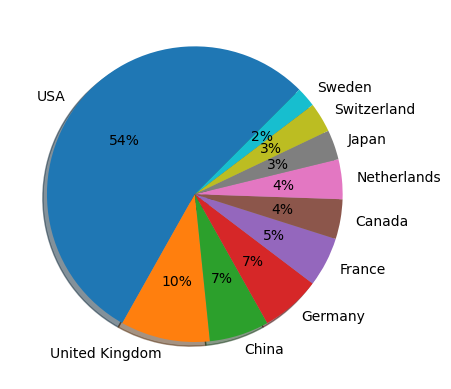

In [38]:
plt.pie(x=top_uni_count.values,
        labels=top_uni_count.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
       )
plt.show()

Text(0.5, 0, 'Top 100')

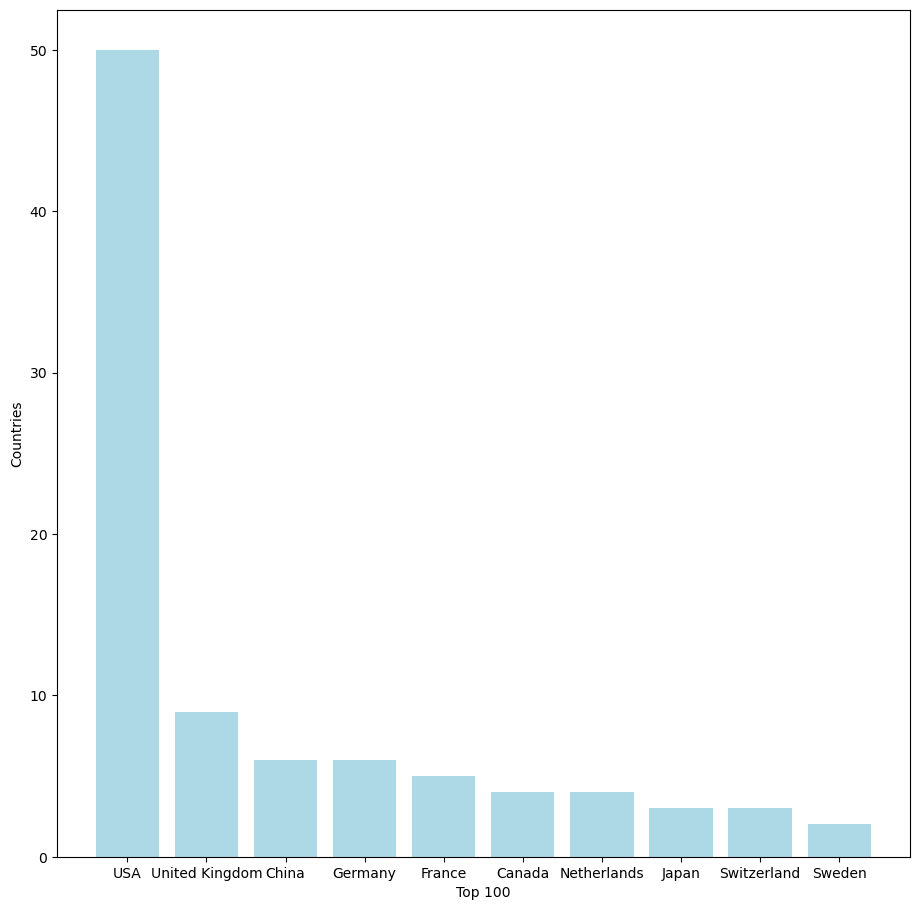

In [54]:
plt.figure(figsize=(11,11))
plt.bar(top_uni_count.index,
        top_uni_count.values,
        color=['lightblue']
       )
plt.ylabel("Countries")
plt.xlabel("Top 100")

In [34]:
top_uni_sum = df_world_rank.head(100)


In [37]:
fig = px.histogram(top_uni_sum,x='Location ',y='Global Rank',
                   title='Overall Rank  For Top 100 Univiersites' )
fig.show()

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

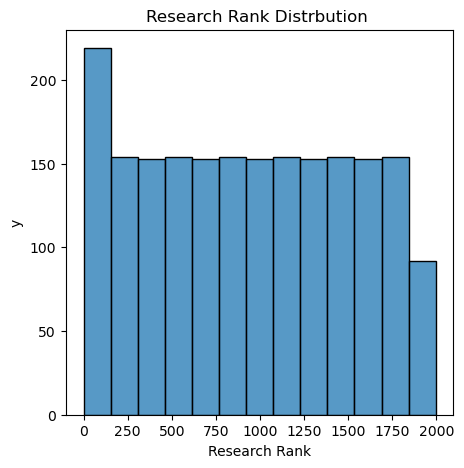

In [40]:
plt.figure(figsize=(5,5))
sns.histplot(data= df_world_rank , x= 'Research Rank')
plt.title('Research Rank Distrbution ')
plt.xlabel('Research Rank')
plt.ylabel('y')
plt.show()

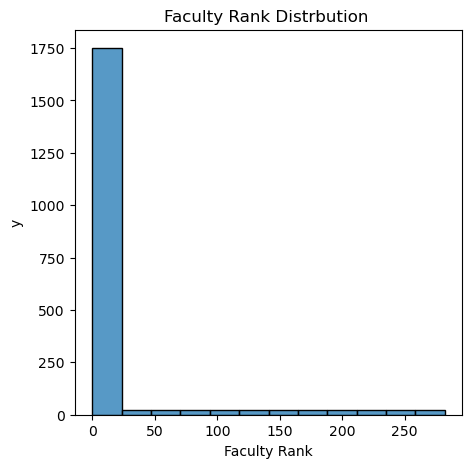

In [41]:
plt.figure(figsize=(5,5))
sns.histplot(data= df_world_rank , x= 'Faculty Rank')
plt.title('Faculty Rank Distrbution ')
plt.xlabel('Faculty Rank')
plt.ylabel('y')
plt.show()

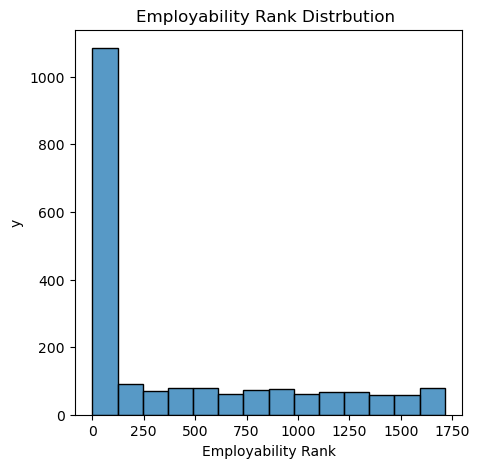

In [42]:
plt.figure(figsize=(5,5))
sns.histplot(data= df_world_rank , x= 'Employability Rank')
plt.title('Employability Rank Distrbution ')
plt.xlabel('Employability Rank')
plt.ylabel('y')
plt.show()

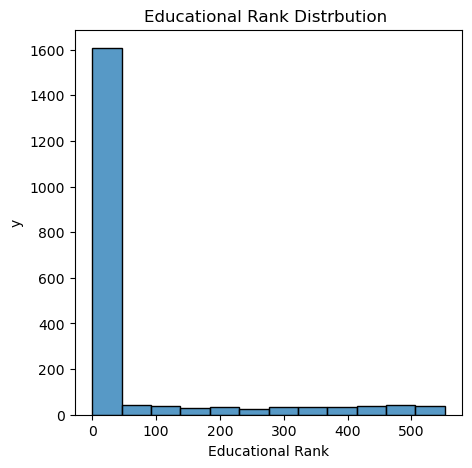

In [43]:
plt.figure(figsize=(5,5))
sns.histplot(data= df_world_rank , x= 'Educational Rank')
plt.title('Educational Rank Distrbution ')
plt.xlabel('Educational Rank')
plt.ylabel('y')
plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.